In [33]:
# GABRIEL DAVID CHANG PEREZ

# Import de librerias e inicialización del data frame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

# data set --> Technical Support Dataset
url = 'https://raw.githubusercontent.com/gchang110101/Analisis-Fuentes-Diversas/refs/heads/main/Technical%20Support%20Dataset.csv'

try:
    data_frame = pd.read_csv(url, encoding='unicode_escape')

    # Crear una copia del dataset original para modificar
    data_frame_modificado = data_frame.copy()

    print('Archivo CSV cargado al Data Frame exitosamente')

    print('\nIMPRIMIENDO HEAD DEL DATA SET\n :', data_frame_modificado.head())

except Exception as ex:
    print('ERROR AL CARGAR EL DF --> ', ex)

Archivo CSV cargado al Data Frame exitosamente

IMPRIMIENDO HEAD DEL DATA SET
 :         Status  Ticket ID Priority Source                     Topic  \
0       Closed       1012      Low  Email           Feature request   
1  In progress       1013     High  Phone             Product setup   
2     Resolved       1014      Low   Chat  Purchasing and invoicing   
3       Closed       1015   Medium  Email     Pricing and licensing   
4       Closed       1016      Low  Email             Product setup   

        Agent Group           Agent Name         Created time  \
0  1st line support      Kristos Westoll  2023-01-02 00:58:36   
1  2nd line support   Adolpho Messingham  2023-01-02 07:27:25   
2  1st line support      Bernard Beckley  2023-01-02 06:59:04   
3  1st line support  Connor Danielovitch  2023-01-03 03:09:39   
4  1st line support      Kristos Westoll  2023-01-03 00:03:58   

  Expected SLA to resolve Expected SLA to first response  \
0     2023-01-04 00:58:36            2023

In [34]:
# Recopilación y Almacenamiento de Datos (4 puntos):

# Encontré este data set en la página de Kaggle, en formato csv, con 22 columnas y habla sobre reportajes de tickets de soporte técnico, muy posiblemente den el contexto
# de una empresa. Se observan a manera de interacciones entre los clientes, trabajadores
# de algún equipo de soporte. Contiene Columnas numéricas, asi como ID, RESULTADOS, CANTIDAD DE
# INTERACCIONES, LONGITUD/LATITUD. y contiene muchas columnas de cadenas/texto, mayormente
# categóricas, asi como STATUS, PRIORIDAD, TOPIC, PAIS, GRUPO DE PRODUCTO, ETC.
# Igualmente contiene columnas relacionadas a fechas y tiempos, como las de FECHA DE CREACION
# EXPECTED TIME TO RESOLVE, RESOLUTION TIME, CLOSE TIME, ETC.

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Cantidad de registros:
print('CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET --> ', data_frame_modificado.shape[0])

# Cantidad de columnas:
print('\nCANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET --> ', data_frame_modificado.shape[1])

# Descripcion de los datos
print(f'\nIMPRRIMIENDO NÚMERO DE FILAS Y TIPOS DE DATOS:\n')
print(data_frame_modificado.info())

CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET -->  2330

CANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET -->  22

IMPRRIMIENDO NÚMERO DE FILAS Y TIPOS DE DATOS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Status                          2330 non-null   object 
 1   Ticket ID                       2330 non-null   int64  
 2   Priority                        2330 non-null   object 
 3   Source                          2330 non-null   object 
 4   Topic                           2330 non-null   object 
 5   Agent Group                     2330 non-null   object 
 6   Agent Name                      2330 non-null   object 
 7   Created time                    2330 non-null   object 
 8   Expected SLA to resolve         2330 non-null   object 
 9   Expected SLA to first response  2330 non-null   object 


In [35]:
# Estadísticas Básicas del data frame: (inicialmente queria utilizar el 'include = all', pero descubrí
# que sin eso, se excluyen las variables que retornarán NaN en las estadísticas)
print(f'IMPRMIENDO ESTADÍSTICAS BÁSICAS DEL DATA FRAME:')
# print(data_frame.describe(include = 'all').T)
print(data_frame.describe().T)

IMPRMIENDO ESTADÍSTICAS BÁSICAS DEL DATA FRAME:
                     count         mean         std          min          25%  \
Ticket ID           2330.0  2481.857082  858.040637  1012.000000  1726.250000   
Agent interactions  2312.0     5.470156    8.130958     1.000000     2.000000   
Survey results      1173.0     3.510656    1.240361     1.000000     3.000000   
Latitude            2330.0    48.260756    5.085409    39.368279    43.036776   
Longitude           2330.0     9.849723    9.814618    -8.019675     2.349014   

                            50%          75%          max  
Ticket ID           2480.000000  3233.750000  3999.000000  
Agent interactions     4.000000     6.000000    60.000000  
Survey results         4.000000     4.000000     5.000000  
Latitude              48.864716    52.536273    55.378052  
Longitude             12.678565    15.474913    25.483304  


In [36]:
# Tabla de frecuencia para Prioridad
tabla_freq_prioridad = data_frame['Priority'].value_counts()

print(f'IMPRIMIENDO TABLA DE FRECUENCIA DE VALORES PARA PRIORITY:\n {tabla_freq_prioridad}')

# Tabla de frecuencia para Source
tabla_freq_source = data_frame['Source'].value_counts()

print(f'\nIMPRIMIENDO TABLA DE FRECUENCIA DE VALORES PARA PRIORITY:\n {tabla_freq_source}')

# Tabla de frecuencia para Topic
tabla_freq_topic = data_frame['Topic'].value_counts()

print(f'\nIMPRIMIENDO TABLA DE FRECUENCIA DE VALORES PARA PRIORITY:\n {tabla_freq_topic}')

IMPRIMIENDO TABLA DE FRECUENCIA DE VALORES PARA PRIORITY:
 Priority
Low       1192
Medium     722
High       416
Name: count, dtype: int64

IMPRIMIENDO TABLA DE FRECUENCIA DE VALORES PARA PRIORITY:
 Source
Email    1234
Chat      850
Phone     246
Name: count, dtype: int64

IMPRIMIENDO TABLA DE FRECUENCIA DE VALORES PARA PRIORITY:
 Topic
Product setup               630
Pricing and licensing       457
Feature request             417
Purchasing and invoicing    264
Bug report                  225
Other                       203
Pricing and Licensing        68
Training request             66
Name: count, dtype: int64


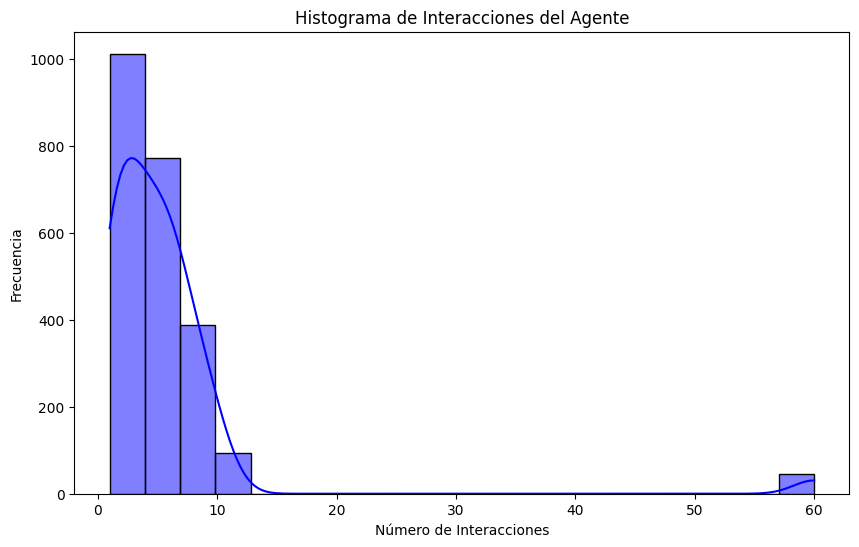

In [37]:
# Histograma de interacciones del agente
# Muestra la distribución del número de interacciones que los agentes tuvieron en los tickets de soporte.
# + linea de intensidad para visualizar la distribución más suavizada

plt.figure(figsize=(10, 6))
sea.histplot(data_frame['Agent interactions'], bins=20, kde=True, color='blue')
plt.title('Histograma de Interacciones del Agente')
plt.xlabel('Número de Interacciones')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Yamila Karim Conrado\AppData\Local\Temp\ipykernel_6640\2180761089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(x='Priority', data=data_frame, palette='viridis')


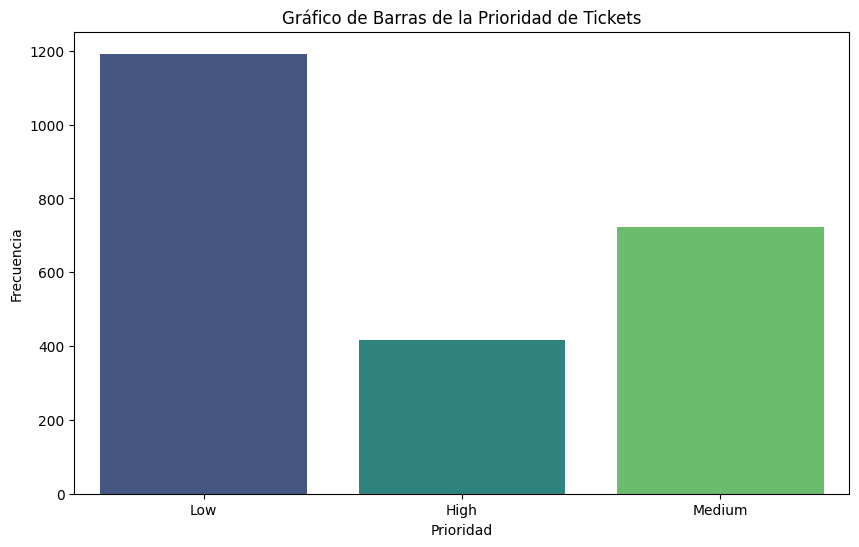

In [38]:
# Gráfico de barras para representar y visualizar la priodad de los tickets de soporte
# Muestra la frecuencia de cada nivel de prioridad

plt.figure(figsize=(10, 6))
sea.countplot(x='Priority', data=data_frame, palette='viridis')
plt.title('Gráfico de Barras de la Prioridad de Tickets')
plt.xlabel('Prioridad')
plt.ylabel('Frecuencia')
plt.show()

In [39]:
# Patrón 1 - Relación entre el nivel de soporte y el tiempo de resolución

# Al analizar los datos de interacciones de los agentes y el tiempo de resolución de tickets
# identifiqué una relación positiva entre estas dos variables. 
# Esto puede indicar que en la mayoría de los casos, a medida que aumenta el número de
# interacciones con el agente, también aumenta ligeramente el tiempo total que toma resolver el ticket

# Transformé las columnas relevantes al patron, que tuvieran datos de fecha/hora, a formato datetime para
# mantener consistencia. Eliminé filas con registros vacíos en las variables clave para el análisis
# para mejorar la calidad del mismo, y creé una nueva columna para representar el tiempo de resolucion en horas.
# en los resultados, se pudo observar que hay una correlación positiva débil entre las dos variables,
# dando a entender que los casos requieren de mayor tiempo de resolución, a medida que incrementan
# las interacciones con el cliente

# Patrón 1 - Relación entre el nivel de soporte y el tiempo de resolución

# Convertir las columnas de tiempo relevantes a formato datetime
data_frame['Resolution time'] = pd.to_datetime(data_frame['Resolution time'], errors='coerce')
data_frame['Close time'] = pd.to_datetime(data_frame['Close time'], errors='coerce')

# Eliminar filas con valores nulos en columnas clave y trabajar sobre una copia explícita del DataFrame
data_frame_patron_1 = data_frame.dropna(subset=['Agent interactions', 'Survey results', 'Resolution time', 'Close time']).copy()

# Crear una nueva columna con el tiempo de resolución en horas utilizando .loc para evitar advertencias
data_frame_patron_1.loc[:, 'Resolution Time (hours)'] = (data_frame_patron_1['Close time'] - data_frame_patron_1['Resolution time']).dt.total_seconds() / 3600

# Correlación entre 'Agent interactions' y 'Resolution Time (hours)'
corr_agent_interactions_x_resolution_time = data_frame_patron_1[['Agent interactions', 'Resolution Time (hours)']].corr()
print("Correlación entre interacciones del agente y tiempo de resolución:")
print(corr_agent_interactions_x_resolution_time)


Correlación entre interacciones del agente y tiempo de resolución:
                         Agent interactions  Resolution Time (hours)
Agent interactions                 1.000000                 0.071219
Resolution Time (hours)            0.071219                 1.000000


In [40]:
# Correlación entre la cantidad de interacciones del agente y los resultados de las encuestas

# Al analizar los datos de interacciones de los agentes y los resultados de las encuestas,
# observé, nuevamente, una relación muy débil entre dos de las variables, en este caso: 
# cantidad de interacciones con los clientes, y los resultados de las encuestas. 
# Esto sugiere que la cantidad de interacciones que un agente tiene con un cliente
# no influye de manera significativa en los resultados de satisfacción reflejados en las encuestas.

# Al igual que con el primer patron, primero limpié los valores nulos
# Luego, calculé la correlación entre las interacciones del agente y los resultados de las encuestas.

# Los resultados mostraron una correlación muy baja, lo que indica que
# el número de interacciones no tiene un impacto relevante en la satisfacción del cliente.
# Esto me indica que la cantidad de interacciones del agente con el cliente, no necesariamente
# define la satisfacción del cliente al final (con la resolución) algunos clientes podrían
# preferir menos interacciones, otros tal vez prefieren mas interacciones, y también están los casos
# en los que la cantidad de interacciones no juega un rol muy impactante en la satisfacción.

# Filtrar el DataFrame para eliminar filas con valores nulos en 'Agent interactions' y 'Survey results'
data_frame_patron_2 = data_frame.dropna(subset=['Agent interactions', 'Survey results']).copy()

# Calcular la correlación entre 'Agent interactions' y 'Survey results'
corr_agent_interactions_survey_results = data_frame_patron_2[['Agent interactions', 'Survey results']].corr()

# Mostrar la correlación
print("Correlación entre interacciones del agente y los resultados de las encuestas:")
print(corr_agent_interactions_survey_results)

Correlación entre interacciones del agente y los resultados de las encuestas:
                    Agent interactions  Survey results
Agent interactions            1.000000        0.017184
Survey results                0.017184        1.000000


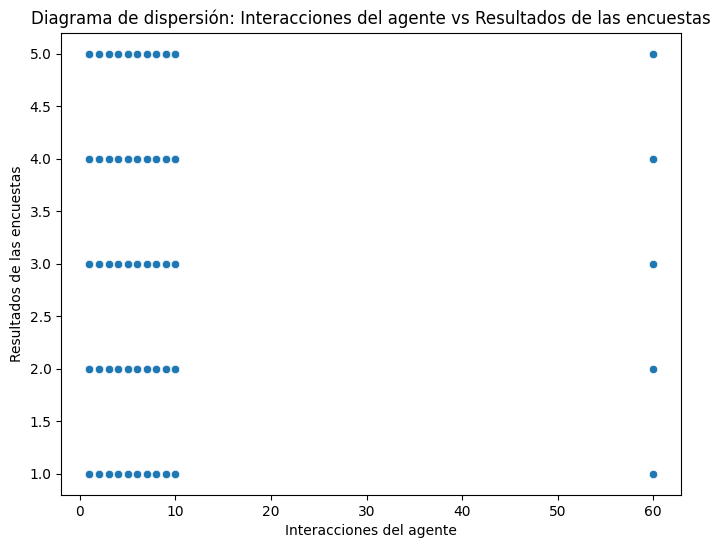

In [41]:
# Exploración de Datos (4 puntos)

# Visualización 1: Diagrama de dispersión entre interacciones del agente y resultados de las encuestas

# El diagrama de dispersión muestra la distribución de los datos entre las interacciones
# del agente y los resultados de las encuestas. De por sí, no se observa un patrón claro ni muy consistente,
# lo que refuerza la correlación débil entre ambas variables.
# La dispersión es amplia, lo que sugiere que la satisfacción del cliente no depende directamente del 
# número de interacciones con el agente.

import matplotlib.pyplot as plt

# Crear el diagrama de dispersión
plt.figure(figsize=(8,6))
sea.scatterplot(data=data_frame_patron_2, x='Agent interactions', y='Survey results')

# Añadir título y etiquetas
plt.title('Diagrama de dispersión: Interacciones del agente vs Resultados de las encuestas')
plt.xlabel('Interacciones del agente')
plt.ylabel('Resultados de las encuestas')

# Mostrar la visualización
plt.show()


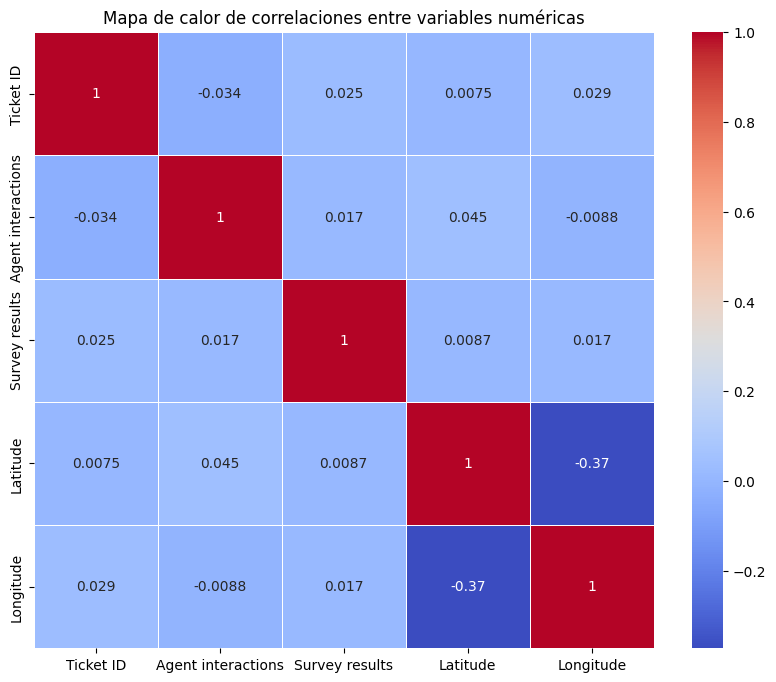

In [42]:
# Visualización 2: Mapa de calor de correlaciones

# Con este heat map, pude confirmar que la correlación entre las interacciones del agente
#  y los resultados de encuestas es prácticamente inexistente (correlación muy cercana a 0).
# El mapa de calor nos permite ver que otras variables tampoco presentan correlaciones 
# fuertes entre sí, lo que indica que las relaciones entre las diferentes variables no son directas ni obvias.

# El mapa de calor muestra una correlación débil entre las interacciones del 
# agente y los resultados de las encuestas, con un valor cercano a 0.017, 
# lo que confirma que no hay una relación significativa entre estas variables. 
# También se observa una correlación negativa moderada entre la latitud y la longitud, 
# lo que indica que hay una relación geográfica entre los tickets que podrían
#  estar relacionados con su ubicación física.

# Selecciono solo las columnas que contienen datos numéricos para el análisis y el heat map
numeric_data_frame = data_frame_patron_2.select_dtypes(include=['float64', 'int64'])

# Crear el mapa de calor de correlaciones entre las variables principales numéricas
plt.figure(figsize=(10,8))
sea.heatmap(numeric_data_frame.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

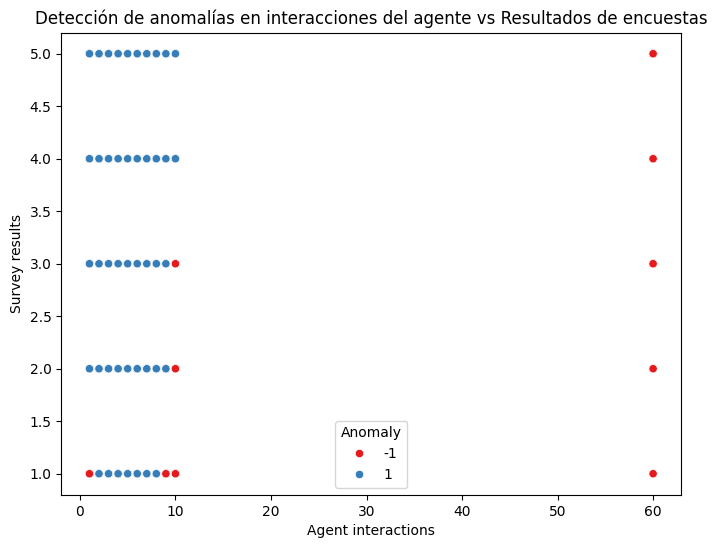

In [43]:
# Detección de anomalías con Isolation Forest 

# En la detección de outliers usando Isolation Forest, logré resaltas varios puntos
# fuera de lo común en el gráfico de dispersión que muestra las interacciones del 
# agente frente a los resultados de las encuestas. Los puntos rojos que se muestran en el gráfico
# representan las anomalías (o outliers) detectadas por el modelo, donde un valor de -1 indica un outlier. 
# Se observa que algunos tickets con un número elevado de interacciones (más de 30) han
# sido clasificados como outliers, junto con otros con pocas interacciones, 
# pero con un resultado promedio en las encuestas.

# Configuré el modelo con un nivel de contaminación del 5%, lo que permitió identificar 
# estos casos únicos. Los outliers detectados sugieren que aveces, el número de interacciones
# excesivamente alto o bajo no sigue la tendencia general de los datos y podría estar
# asociado con problemas específicos que requieren atención especial, o que reciben mayor
# impacto de otras variables del contexto.

from sklearn.ensemble import IsolationForest

# Aplicar el algoritmo de detección de anomalías Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=0)
numeric_data_frame = numeric_data_frame.select_dtypes(include=['float64', 'int64']).dropna()
numeric_data_frame['Anomaly'] = isolation_forest.fit_predict(numeric_data_frame[['Agent interactions', 'Survey results']])

# Visualizar los outliers detectados
plt.figure(figsize=(8,6))
sea.scatterplot(x='Agent interactions', y='Survey results', hue='Anomaly', data=numeric_data_frame, palette='Set1')
plt.title('Detección de anomalías en interacciones del agente vs Resultados de encuestas')
plt.show()